In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
#Load Python Libraries
import swat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#LoadData
battles=pd.read_csv('/content/gdrive/My Drive/t_SNE_datasets/battles.csv')


**Preprocessing**

In [0]:
#Preprocessing 
battles_data=battles.isnull().sum()


In [0]:
battles_data_with_na=battles_data[battles_data==0]

In [0]:
data=battles[battles_data_with_na.keys()]

In [0]:
data=data.drop(data.columns[[0,3,4]],axis=1)
dt_df=data.copy()

**Encode the Categorical Variables**

In [0]:

le=LabelEncoder()
for col in data.columns.values:
    if data[col].dtypes == "object":
        unique_labels=np.unique(data[col])
        le.fit(unique_labels)
        data[col]=le.transform(data[col])

**Feature scaling**

In [0]:

x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [0]:
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
x_std=standard_scaler.fit_transform(x)

In [0]:
#t-distributed stochastic Neighbour Embedding (t-SNE) Visualization
from sklearn.manifold import TSNE
t_sne=TSNE(n_components=2,random_state=0)
x_std_2d =t_sne.fit_transform(x_std)

In [0]:
x_std_2d_df=pd.DataFrame(x_std_2d,columns=['dim_1','dim_2'])

In [0]:
tsne_out=pd.concat([dt_df,x_std_2d_df],axis=1)

In [87]:
tsne_out.columns

Index(['battle_number', 'battle_type', 'region', 'dim_1', 'dim_2'], dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


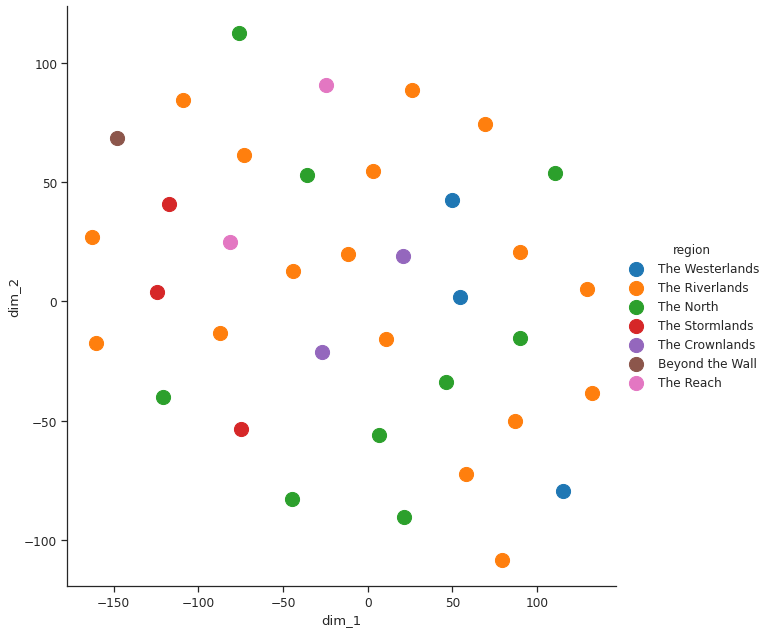

In [89]:
# Plot t-SNE
import seaborn as sns
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='dim_1',
           y='dim_2',
           data=tsne_out,
           fit_reg=False,
           legend=True,
           size=9,
           hue='region',
           scatter_kws={"s":200, "alpha":1.0})

plt.title('PCA Results: Game of Thrones', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')